In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt

In [2]:
#importing dataset of covid confirmed cases of different countries datewise
data=pd.read_csv("covid19_Confirmed_dataset.csv")
data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [3]:
#lets checck for the shape of dataset
data.shape

(266, 104)

# Cleaning data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 104 entries, Province/State to 4/30/20
dtypes: float64(2), int64(100), object(2)
memory usage: 216.2+ KB


In [5]:
#lets see null values in province columns
data['Province/State'].isnull().sum()

184

In [6]:
# as seen above province/state have 184 null values so seen unuseful column
#hence we can drop these column
data.drop(['Province/State'],axis=1,inplace=True)

In [7]:
data.shape

(266, 103)

In [8]:
data.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [9]:
#also lat and long can also be dropped
data.drop(["Lat","Long"],axis=1,inplace=True)

In [10]:
data.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,Albania,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,Algeria,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,Andorra,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,Angola,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [11]:
len(list(data["Country/Region"].unique()))

187

In [12]:
#As we are going to use Country name as our index
#So make Country as index of dataset
data=data.groupby("Country/Region").sum()

In [13]:
data.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [14]:
#as we have seen total countries are 187 in list 
#therefore no of rows in data becomes 187
data.shape


(187, 100)

<AxesSubplot:>

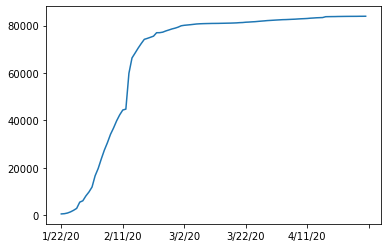

In [15]:
data.loc["China"].plot()

<AxesSubplot:>

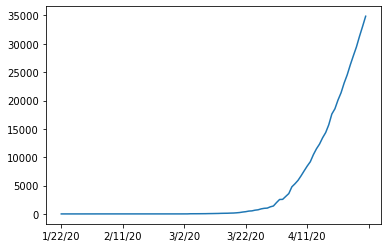

In [16]:
data.loc["India"].plot()

<AxesSubplot:>

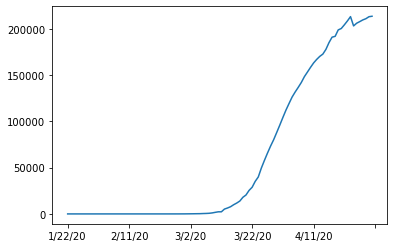

In [17]:
data.loc["Spain"].plot()

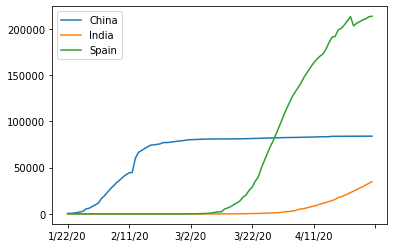

In [18]:
data.loc["China"].plot()
data.loc["India"].plot()
data.loc["Spain"].plot()
plt.legend()
plt.show()

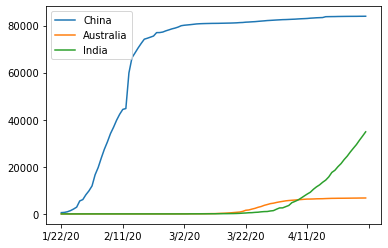

In [19]:
data.loc["China"].plot()
data.loc["Australia"].plot()
data.loc["India"].plot()
plt.legend()
plt.show()

<AxesSubplot:>

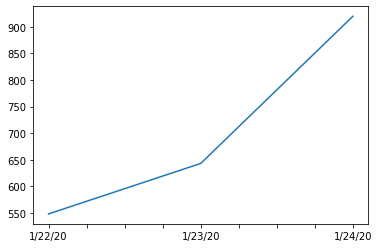

In [20]:
data.loc["China"][:3].plot()

#As we seen above trend of increment of three differ countries
#lets go behind increment

In [21]:
data.loc["China"].diff()

1/22/20      NaN
1/23/20     95.0
1/24/20    277.0
1/25/20    486.0
1/26/20    669.0
           ...  
4/26/20      3.0
4/27/20      6.0
4/28/20     22.0
4/29/20      4.0
4/30/20     12.0
Name: China, Length: 100, dtype: float64

<AxesSubplot:>

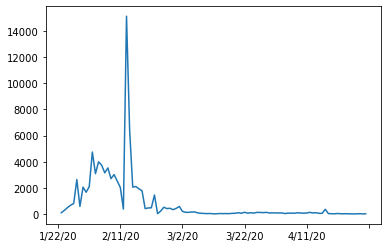

In [22]:
data.loc["China"].diff().plot()

In [38]:
data.loc["India"].diff()

1/22/20       NaN
1/23/20       0.0
1/24/20       0.0
1/25/20       0.0
1/26/20       0.0
            ...  
4/26/20    1607.0
4/27/20    1561.0
4/28/20    1873.0
4/29/20    1738.0
4/30/20    1801.0
Name: India, Length: 100, dtype: float64

[]

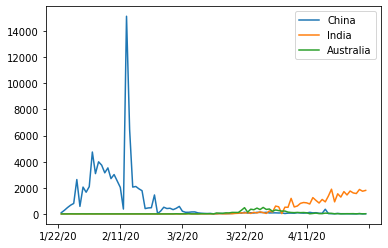

In [39]:
#lets plot the values of increment
list=['China','India','Australia']
for country in list:
    data.loc[country].diff().plot()
plt.legend()
plt.plot()

In [23]:
data.loc["China"].diff().max()

15136.0

In [24]:
data.loc["India"].diff().max()

1893.0

In [25]:
data.loc["Spain"].diff().max()

9630.0

In [26]:
#lets add a new column having maximum infection rate of eacch country in dataset
countries=list(data.index)
maximum_infection_rate=[]
for country in countries:
    maximum_infection_rate.append(data.loc[country].diff().max())
    
data['Max_Infection_rate']=maximum_infection_rate

In [28]:
data

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,Max_Infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,474,480,484,342,342,342,343,344,344,66.0
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,4.0
Yemen,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,6,6,5.0


In [29]:
corona_data=pd.DataFrame(data['Max_Infection_rate'])

In [31]:
corona_data

,Max_Infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0
...,...
West Bank and Gaza,66.0
Western Sahara,4.0
Yemen,5.0


In [32]:
corona_data.shape

(187, 1)

In [33]:
#Now we are going toward the happiness report dataset
dataset=pd.read_csv("worldwide_happiness_report.csv")
dataset

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [34]:
#Overall Rank,Score,Perception of corruption,Generosity
dataset.drop(['Overall rank','Score','Generosity','Perceptions of corruption'],axis=1,inplace=True)

In [35]:
dataset.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [36]:
dataset.set_index('Country or region',inplace=True)

In [37]:
dataset.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [39]:
corona_data.shape

(187, 1)

In [40]:
dataset.shape

(156, 4)

In [41]:
df=corona_data.join(dataset,how='inner')

In [43]:
df

,Max_Infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283
...,...,...,...,...,...
Venezuela,29.0,0.960,1.427,0.805,0.154
Vietnam,19.0,0.741,1.346,0.851,0.543
Yemen,5.0,0.287,1.163,0.463,0.143
Zambia,9.0,0.578,1.058,0.426,0.431


In [42]:
df.shape

(143, 5)

In [44]:
df.corr()

,Max_Infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Max_Infection_rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


<AxesSubplot:>

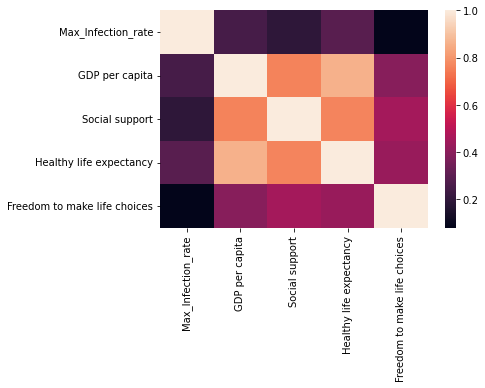

In [90]:
sns.heatmap(df.corr())

C:\Users\LENOVO\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP per capita', ylabel='Max_Infection_rate'>

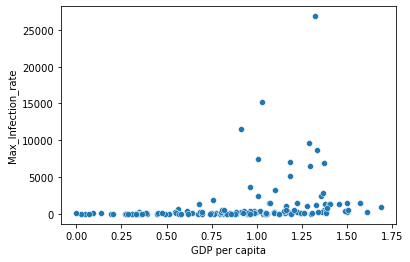

In [45]:
#Now lets plot the columns against max column rate
x=df["GDP per capita"]
y=df["Max_Infection_rate"]
sns.scatterplot(x,y)

C:\Users\LENOVO\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP per capita', ylabel='Max_Infection_rate'>

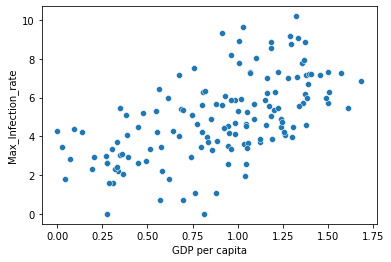

In [46]:
x=df["GDP per capita"]
y=df["Max_Infection_rate"]
sns.scatterplot(x,np.log(y))

C:\Users\LENOVO\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Social support', ylabel='Max_Infection_rate'>

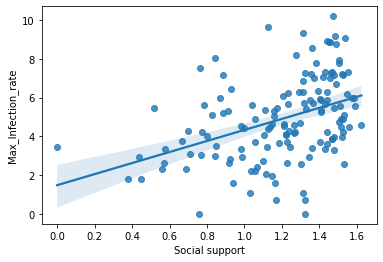

In [96]:
sns.regplot(x,np.log(y))

C:\Users\LENOVO\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Social support', ylabel='Max_Infection_rate'>

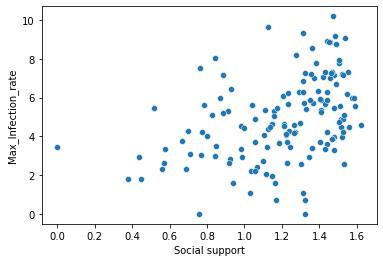

In [95]:
x=df["Social support"]
y=df["Max_Infection_rate"]
sns.scatterplot(x,np.log(y))

C:\Users\LENOVO\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Social support', ylabel='Max_Infection_rate'>

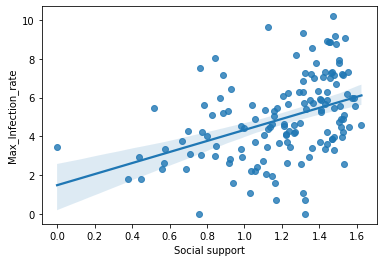

In [97]:
sns.regplot(x,np.log(y))

C:\Users\LENOVO\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Healthy life expectancy', ylabel='Max_Infection_rate'>

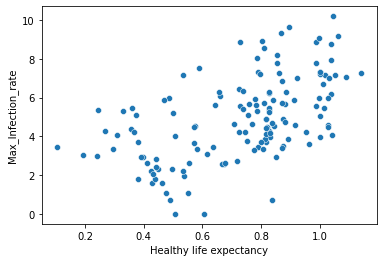

In [49]:
x=df["Healthy life expectancy"]
y=df["Max_Infection_rate"]
sns.scatterplot(x,np.log(y))

C:\Users\LENOVO\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Healthy life expectancy', ylabel='Max_Infection_rate'>

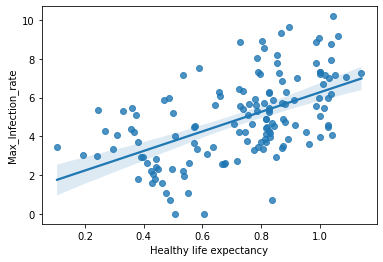

In [50]:
sns.regplot(x,np.log(y))

C:\Users\LENOVO\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Freedom to make life choices', ylabel='Max_Infection_rate'>

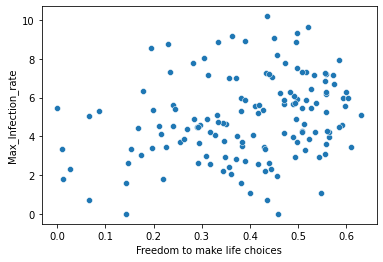

In [51]:
x=df["Freedom to make life choices"]
y=df["Max_Infection_rate"]
sns.scatterplot(x,np.log(y))

C:\Users\LENOVO\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Freedom to make life choices', ylabel='Max_Infection_rate'>

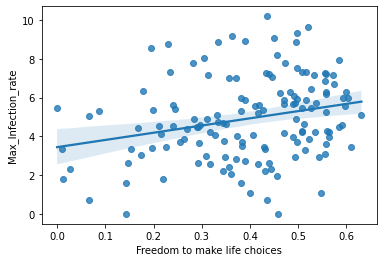

In [52]:
sns.regplot(x,np.log(y))